In [1]:
import json
import pandas as pd
from tqdm import tqdm
from bs4 import BeautifulSoup

In [3]:
with open("./data/강남역 데이트 맛집.json", "r", encoding='utf-8') as f:
    blog = json.load(f)

In [22]:
idx = 57

<html data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36 Edg/116.0.1938.81" lang="ko"><head>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="-1" http-equiv="Expires"/>
<meta content="always" name="referrer"/>
<!--[if ie]>
<style type="text/css">
html {overflow: scroll; overflow-x: auto;}
</style>
<![endif]-->
<link charset="UTF-8" href="https://ssl.pstatic.net/t.static.blog/mylog/versioning/LayoutTopCommon-358144226_https.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/t.static.blog/mylog/versioning//common/css/music/player-d3fc09e_https.css" rel="stylesheet" type="text/css"/>
<link href="/favicon.ico?3" rel="shortcut icon" type="image/x-icon"/>
<meta content="강남역 데이트 맛집 리얼스페인에서 생파" property="og:title"/>
<meta content="https://blogthumb.pstatic.net/MjAxODA0MTBfMTYy/MDAxNTIzMzU1NzQyODM1.zk9Oi6HQMv14sE650QgX84nMmSZ4WixLTvec7UxyPf4g.7l5Pwj3ibILKllgDDVucfOFAImu3-6IZm01rQqo
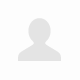
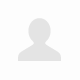

In [23]:
soup = BeautifulSoup(blog[idx]["origin_source"], 'html.parser')
soup

In [26]:
body_soup = soup.find("div", {"class": "view"})
body_soup

<div class="view" style="font-size:12pt; font-family:'3028412_12';"><p align="center" style="text-align: center;"><br/></p><p align="center" style="text-align: center;"><span style="font-size: 18pt;"><strong>​강남역 데이트 맛집 리얼스페인에서 생파</strong></span></p><p align="center" style="text-align: center;"><span>​</span></p><p align="center" style="text-align: center;"><span>​</span></p><p align="center" style="text-align: center;"><span>​</span><img alt="" class="_photoImage egjs-visible" data-lazy-src="" height="675" id="MjAxODA0MTBfMjM3/MDAxNTIzMzU1NzQwMTEz.-GsOvmkj0sLfmDqVvKGGavw2_vZgYo7rWQrEqWDu2fog.JOUi7mF9nZ3feFs7cdhp7lvVa3DF_XTIv8uu0Vf5uZsg.JPEG.happy_love02/0-horz.jpg" onclick="popview(this, '90000003_00000000000000338382C810')" src="https://postfiles.pstatic.net/MjAxODA0MTBfMjM3/MDAxNTIzMzU1NzQwMTEz.-GsOvmkj0sLfmDqVvKGGavw2_vZgYo7rWQrEqWDu2fog.JOUi7mF9nZ3feFs7cdhp7lvVa3DF_XTIv8uu0Vf5uZsg.JPEG.happy_love02/0-horz.jpg?type=w1" style="cursor: pointer; rwidth: 900px; rheight: 675px;" width="

In [29]:
body_soup

<div class="view" style="font-size:12pt; font-family:'3028412_12';"><p align="center" style="text-align: center;"><br/></p><p align="center" style="text-align: center;"><span style="font-size: 18pt;"><strong>​강남역 데이트 맛집 리얼스페인에서 생파</strong></span></p><p align="center" style="text-align: center;"><span>​</span></p><p align="center" style="text-align: center;"><span>​</span></p><p align="center" style="text-align: center;"><span>​</span><img alt="" class="_photoImage egjs-visible" data-lazy-src="" height="675" id="MjAxODA0MTBfMjM3/MDAxNTIzMzU1NzQwMTEz.-GsOvmkj0sLfmDqVvKGGavw2_vZgYo7rWQrEqWDu2fog.JOUi7mF9nZ3feFs7cdhp7lvVa3DF_XTIv8uu0Vf5uZsg.JPEG.happy_love02/0-horz.jpg" onclick="popview(this, '90000003_00000000000000338382C810')" src="https://postfiles.pstatic.net/MjAxODA0MTBfMjM3/MDAxNTIzMzU1NzQwMTEz.-GsOvmkj0sLfmDqVvKGGavw2_vZgYo7rWQrEqWDu2fog.JOUi7mF9nZ3feFs7cdhp7lvVa3DF_XTIv8uu0Vf5uZsg.JPEG.happy_love02/0-horz.jpg?type=w1" style="cursor: pointer; rwidth: 900px; rheight: 675px;" width="

In [10]:
type(body_soup)

bs4.element.Tag

In [40]:
# body_soup.find_all("div", {"class": "se-module"})[0]
body_soup.find_all("p", {"class": None})[11]

<p align="center" style="text-align: center;">각자의 생일이면 항상 모이는 커플 아직까진 운좋게도 다들 사이가 좋아요ㅋㅋㅋ</p>

In [19]:
blog[idx]['url']

'https://blog.naver.com/gripia84/223023074670'

In [46]:
def extract_text(source: str):
    soup = BeautifulSoup(source, 'html.parser')
    body_soup = soup.find("div", {"class": "se-main-container"})
    
    text = body_soup.text if body_soup else ""
    return text

In [57]:
result = []
for data in tqdm(dff):
    temp = blog[data].copy()
    
    temp['text'] = extract_text(temp['origin_source'])
    del temp['origin_source']
    
    result.append(temp)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 296/296 [00:26<00:00, 11.12it/s]


In [59]:
df = pd.DataFrame(result)

In [60]:
df[df.text == ''].sort_values('date')

,title,url,blog_name,date,text
279,<b>강남역 데이트</b>코스 / <b>데이트 맛집</b> - 겐로쿠우동 ★,https://blog.naver.com/yjyj0322/40193764567,냠냠이의 맛집 찾기!,20130725,
251,<b>강남역 데이트 맛집</b> - 건강을 생각하는 레스토랑 오율[Oyull],https://blog.naver.com/ultrabat/80199698744,Shoot for the Sky!,20131012,
68,<b>강남역 데이트 맛집</b> 강남 포도나무집,https://blog.naver.com/ice0228/10184934038,하라의 리뷰를 구하라,20140206,
247,[ <b>강남</b> <b>맛집</b> / <b>데이트 맛집</b>... (bist...,https://blog.naver.com/charmingjn/90190091418,한쁘리의 뷰티풀로그,20140214,
120,[<b>강남역 데이트 맛집</b>] BEST 강남역데이트장소 투어,https://blog.naver.com/jjhouse79/130185927879,vive como quieras,20140219,
...,...,...,...,...,...
294,"<b>강남역</b> <b>맛집</b>, 신논현<b>맛집</b>, <b>강남</b> ...",https://blog.naver.com/jeons1007/221730602718,심술궂은 토깽이,20191208,
44,<b>강남역 데이트 맛집</b> 은하수 런치 대박!,https://blog.naver.com/ya88462/222031440976,CRS & ROREAL,20200715,
191,<b>강남역</b> <b>맛집</b> 술집 추천 육회... 꼬막 <b>맛집</b> ...,https://blog.naver.com/smileagain2015/22227282...,★스마일어게인★,20210312,
254,스테이크 후기 코스 <b>강남역</b> 모모사라 <b>데이트 맛집</b> <b>강남...,https://blog.naver.com/dudrn1700/222582445305,노블레스,20211130,


In [42]:
dff

Int64Index([ 57,  60,  62,  63,  70,  75,  78,  80,  81,  82,
            ...
            952, 957, 958, 963, 965, 966, 969, 977, 978, 981],
           dtype='int64', length=296)